Fist we import the required modules.

In [1]:
import random
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

from unityagents import UnityEnvironment
from UnityDQNAgent import UnityDQNAgent

Then we make a unity envionment and use it to create an agent.

In [2]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
hyperparams = { 'batch_size':500,   # minibatch size
                'gamma':0.99,       # discount factor
                'lr':1e-4,          # learning rate
                'update_every':2,   # how often we update the target network
                'tau':1e-3,         # weight for the soft update of the target network
                'eps_start':0.9,
                'eps_end':0.01, 
                'eps_decay':0.98,
                'seed':2147483647 } # random seed

agent = UnityDQNAgent(env, brain_name=brain_name, \
                        state_size=state_size, action_size=action_size, **hyperparams)

The following function will be run at every episode. We use it to plot our progress and check if we have solved the game.

In [4]:
def is_finished(scores, num_episodes):
    plot_every = 10
    avg_every = 100
    winning_threshold = 13
    
    i = len(scores)
    finished = (i >= avg_every and np.mean(scores[i-avg_every:i]) >= winning_threshold)

    if not finished and (i+1) % plot_every != 0: return False
    
    mean_scores = [np.mean(scores[max(0, j-avg_every+1):j+1]) for j in range(i)]
    plt.plot(scores, color='red')
    plt.plot(mean_scores, color='blue')
    display.display(plt.gcf())
    print("\r Episode {}/{}\tAverage Score: {:.2f}".format(i+1, num_episodes, mean_scores[-1]), end="")
    display.clear_output(wait=True)
    if finished:
        print("\r Finished in episode {}/{}\tAverage Score: {:.2f}".format(i+1, num_episodes, mean_scores[-1]))
    return finished

We can now train the agent

 Finished in episode 256/1000	Average Score: 13.05


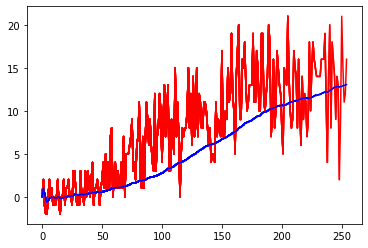

In [5]:
scores = agent.train(500, is_finished=is_finished)

To observe the trained agent in action, we use the `agent.run()`

In [31]:
agent.run()

[16.0]

In [ ]:
env.close()